In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:

data = pd.read_csv('/Users/adityasrivatsav/Documents/GitHub/Netflix-Release-Date-Optimization-for-Maximum-Viewership/netflix_titles.csv')


In [37]:
data.head(5) #first five rows of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
data.describe() #basic stats of the data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [39]:
data.shape #dimensions of the dataset

(8807, 12)

In [40]:
data.columns #column names
data.info() #data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [41]:
#Calculate the sum of missing entries in the dataset
data.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [42]:
# Data Preprocessing
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['added_month'] = data['date_added'].dt.month
data['added_year'] = data['date_added'].dt.year

# Handle missing values
data['country'].fillna('Unknown', inplace=True)
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['added_month'].fillna(0, inplace=True) 


/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/1415925678.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)
/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/1415925678.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [43]:
# Feature Engineering: Season Indicators
def determine_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Unknown"

data['season'] = data['added_month'].apply(determine_season)

# Genre Encoding
genre_dummies = data['listed_in'].str.get_dummies(sep=', ')
Net_data = pd.concat([data, genre_dummies], axis=1)

# Content Type Encoding
Net_data['type_encoded'] = Net_data['type'].map({'Movie': 1, 'TV Show': 0})


In [44]:
# Counts the no. of movies in each type
type_counts = data['type'].value_counts()

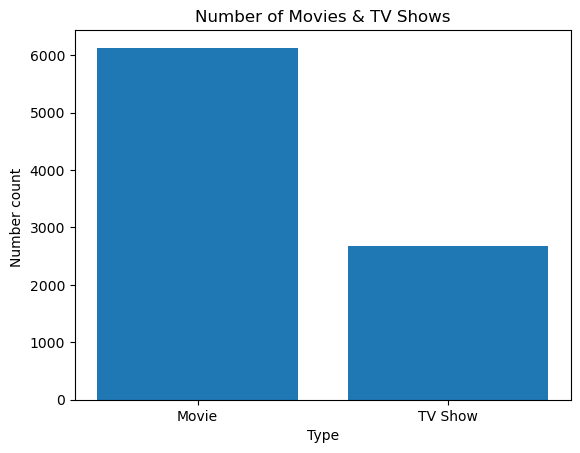

In [45]:
# Create a bar plot of the movie counts by type
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Number count ')
plt.title('Number of Movies & TV Shows')
plt.show()

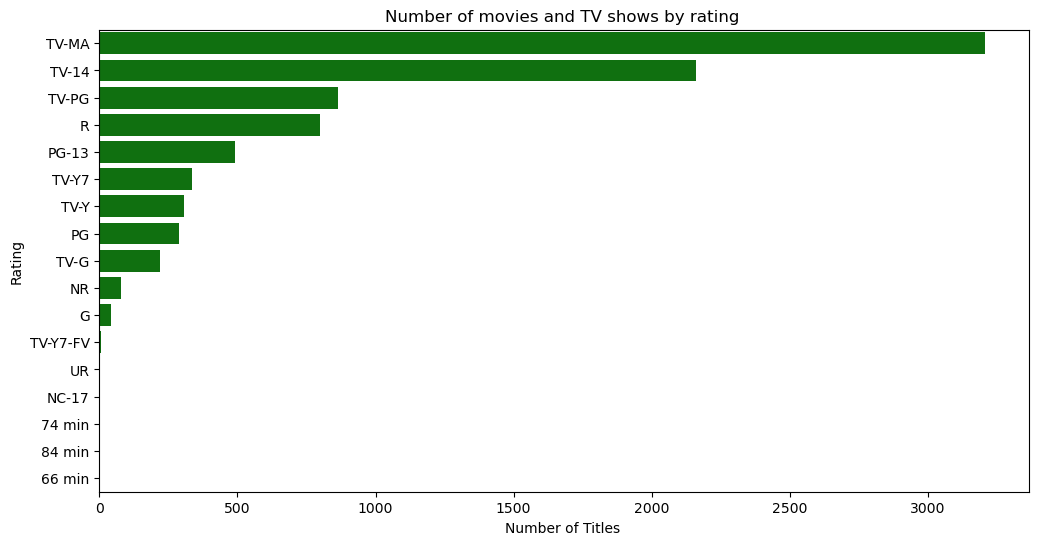

In [46]:
plt.figure(figsize=(12,6))
rating_data = data.groupby('rating')['title'].count().sort_values(ascending = False)
sns.barplot(x=rating_data.values, y=rating_data.index, color = 'green')
plt.title('Number of movies and TV shows by rating ')
plt.xlabel('Number of Titles ')
plt.ylabel('Rating')
plt.show()

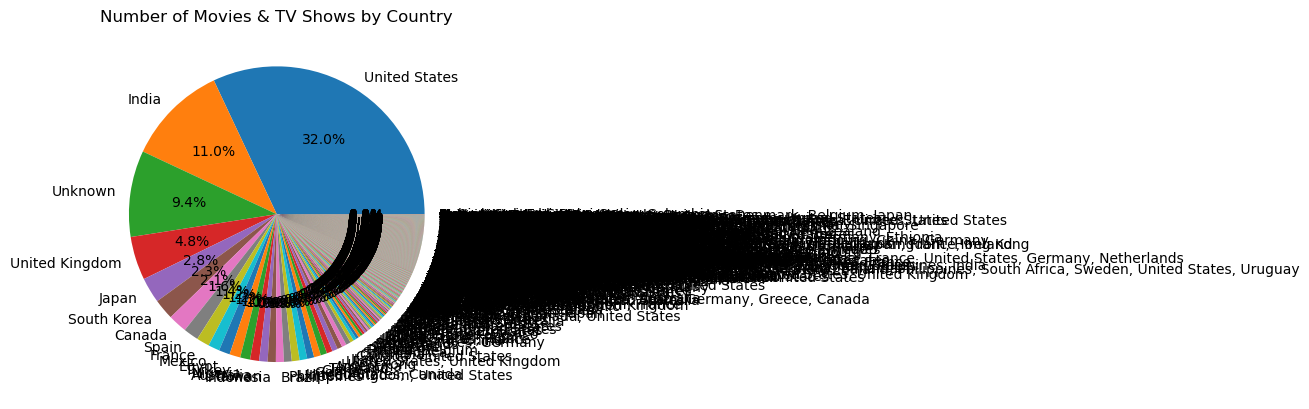

In [47]:
# pie chart of the number of movies and TV shows country wise
country_data = data['country'].value_counts()
plt.pie(country_data.values, labels=country_data.index, autopct='%1.1f%%')
plt.title('Number of Movies & TV Shows by Country')
plt.show()

<Axes: xlabel='release_year'>

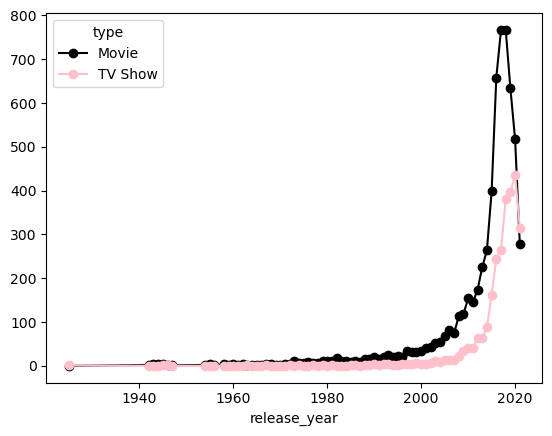

In [48]:
content_counts = data.groupby(["release_year", "type"]).size().unstack(fill_value = 0)
content_counts.plot(kind = 'line', marker='o',color=['black','pink'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


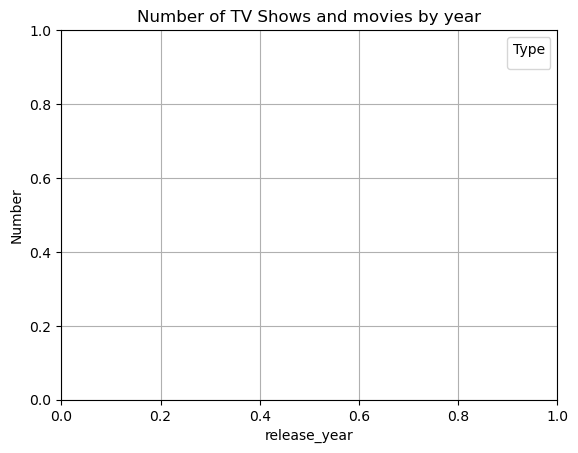

In [49]:
plt.xlabel("release_year")
plt.ylabel('Number')
plt.title('Number of TV Shows and movies by year')
plt.legend(title='Type')
plt.grid(True)
plt.show()

In [50]:
listed_in_counts = data['listed_in'].value_counts()
top_10 = listed_in_counts.head(10)

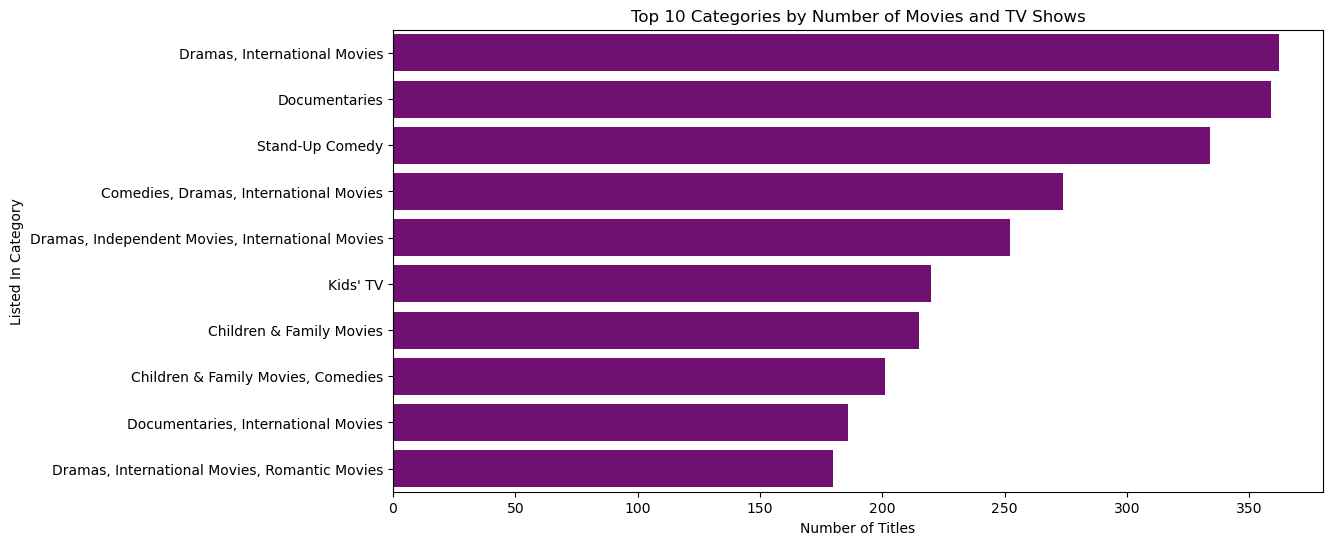

In [51]:
# Create a bar plot of the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index,color='purple')
plt.xlabel('Number of Titles')
plt.ylabel('Listed In Category')
plt.title('Top 10 Categories by Number of Movies and TV Shows')
plt.show()

In [52]:
# Count the number of movies and TV shows directed by each director
director_data = data['director'].value_counts()

# Get the top 10 directors with the most movies and TV shows
top_10_directors = director_data.head(10)

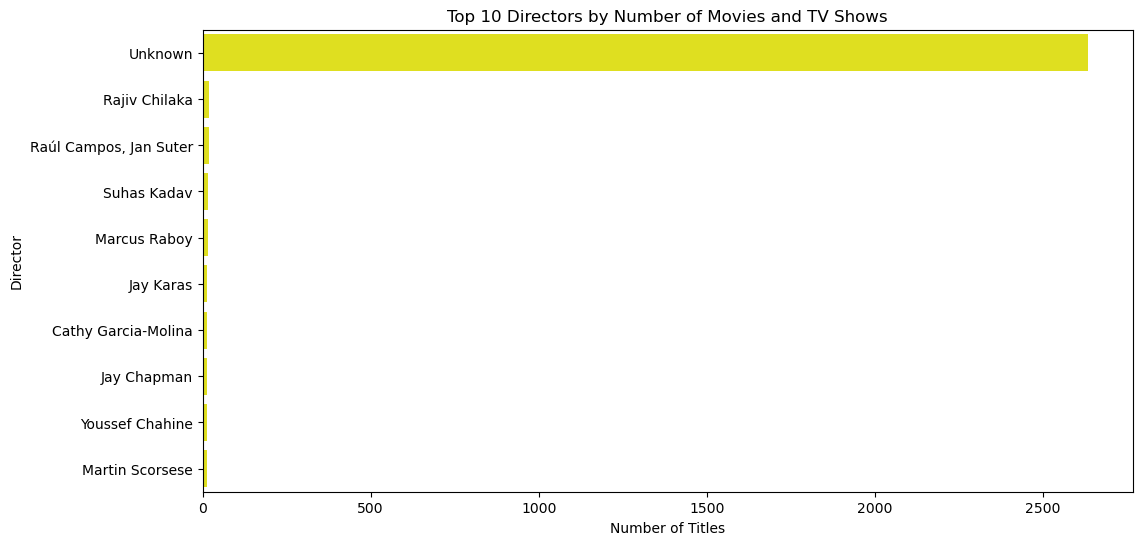

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,color='yellow')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies and TV Shows')
plt.show()

In [54]:
# Save the data to a new CSV file
Net_data.to_csv('Netflix_data.csv', index=False)

In [55]:
# Ensure that there are no NaN values in the dataset
Net_data.isnull().sum(axis=0)

show_id                          0
type                             0
title                            0
director                         0
cast                             0
country                          0
date_added                      98
release_year                     0
rating                           4
duration                         3
listed_in                        0
description                      0
added_month                      0
added_year                      98
season                           0
Action & Adventure               0
Anime Features                   0
Anime Series                     0
British TV Shows                 0
Children & Family Movies         0
Classic & Cult TV                0
Classic Movies                   0
Comedies                         0
Crime TV Shows                   0
Cult Movies                      0
Documentaries                    0
Docuseries                       0
Dramas                           0
Faith & Spirituality

In [56]:
cleaned_netflix_data = pd.read_csv('Netflix_data.csv')

In [57]:
# Fill added_year and added_month with most frequent values
cleaned_netflix_data['added_year'].fillna(cleaned_netflix_data['added_year'].mode()[0], inplace=True)
cleaned_netflix_data['added_month'].fillna(cleaned_netflix_data['added_month'].mode()[0], inplace=True)

/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/2777785422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_netflix_data['added_year'].fillna(cleaned_netflix_data['added_year'].mode()[0], inplace=True)
/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/2777785422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the in

In [58]:
#Encode the targeted Variable
cleaned_netflix_data['season_encoded'] = cleaned_netflix_data['season'].astype('category').cat.codes

In [59]:
# Selection of relevant features
features = cleaned_netflix_data[
    ['release_year', 'added_month', 'added_year', 'type_encoded'] + 
    [col for col in cleaned_netflix_data.columns if col.startswith(('Action', 'TV', 'Movies'))]
]
target = cleaned_netflix_data['season_encoded']

In [60]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [61]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100,  random_state=42)
rf_model.fit(train_x, train_y)


RandomForestClassifier(random_state=42)

In [62]:
# Prdict the model
predictions = rf_model.predict(test_x)

In [63]:
# Model Classification Report
classification_results = classification_report(test_y, predictions, target_names=cleaned_netflix_data['season'].unique())
conf_matrix = confusion_matrix(test_y, predictions)

classification_results, conf_matrix

('              precision    recall  f1-score   support\n\n        Fall       1.00      1.00      1.00       459\n      Summer       1.00      1.00      1.00       410\n      Spring       1.00      1.00      1.00       436\n      Winter       1.00      0.94      0.97        17\n     Unknown       1.00      1.00      1.00       440\n\n    accuracy                           1.00      1762\n   macro avg       1.00      0.99      0.99      1762\nweighted avg       1.00      1.00      1.00      1762\n',
 array([[459,   0,   0,   0,   0],
        [  0, 410,   0,   0,   0],
        [  0,   0, 436,   0,   0],
        [  0,   0,   0,  16,   1],
        [  0,   0,   0,   0, 440]]))

In [64]:
# Accuracy of the model
accuracy = rf_model.score(test_x, test_y)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 99.94%


In [65]:
def predict_season(release_year, added_month, added_year, movie_type, genres):
    # Initialize the input data with all training feature columns
    input_data = pd.DataFrame(columns=features.columns, index=[0])
    input_data.fillna(0, inplace=True)  # Set all values to 0 initially

    # Populate the required fields
    input_data['release_year'] = release_year
    input_data['added_month'] = added_month
    input_data['added_year'] = added_year
    input_data['type_encoded'] = 1 if movie_type == 'Movie' else 0

    # Set genre columns based on input genres
    for genre in genres.split(', '):
        if genre in input_data.columns:
            input_data[genre] = 1

    # Make a prediction
    prediction = rf_model.predict(input_data)
    
    # Map the prediction to the season name
    season_mapping = dict(enumerate(cleaned_netflix_data['season'].astype('category').cat.categories))
    return season_mapping[prediction[0]]

# Predict the season of a movie released in 2021
predicted_season = predict_season(2021, 3, 2021, 'Movie', 'Action & Adventure, Comedies')
print(f'The predicted season is: {predicted_season}')


The predicted season is: Spring


/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/3699539912.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data.fillna(0, inplace=True)  # Set all values to 0 initially


/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/3699539912.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data.fillna(0, inplace=True)  # Set all values to 0 initially
/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/3699539912.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data.fillna(0, inplace=True)  # Set all values to 0 initially
/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_14018/3699539912.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecate

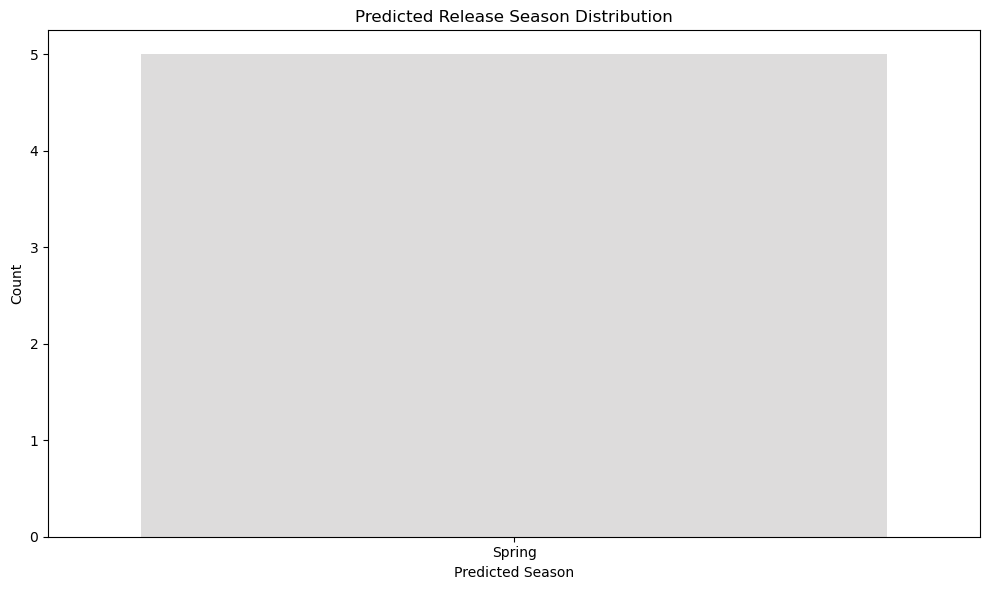

In [66]:
# Predict the season of a movie released in 2021
# Genres for testing
genres = ['Action & Adventure', 'Comedies', 'Dramas', 'Documentaries', 'Horror Movies']

# Predictions for each genre
predictions = [predict_season(2021, 3, 2021, 'Movie', genre) for genre in genres]

# Create a DataFrame for visualization
results = pd.DataFrame({
    'Genre': genres,
    'Predicted Season': predictions
})

# Ensure "Predicted Season" is countable for visualization
season_counts = results.groupby('Predicted Season')['Genre'].count().reset_index()
season_counts.columns = ['Predicted Season', 'Count']

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted Season', y='Count', data=season_counts, palette='coolwarm', errorbar=None)
plt.title('Predicted Release Season Distribution')
plt.xlabel('Predicted Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


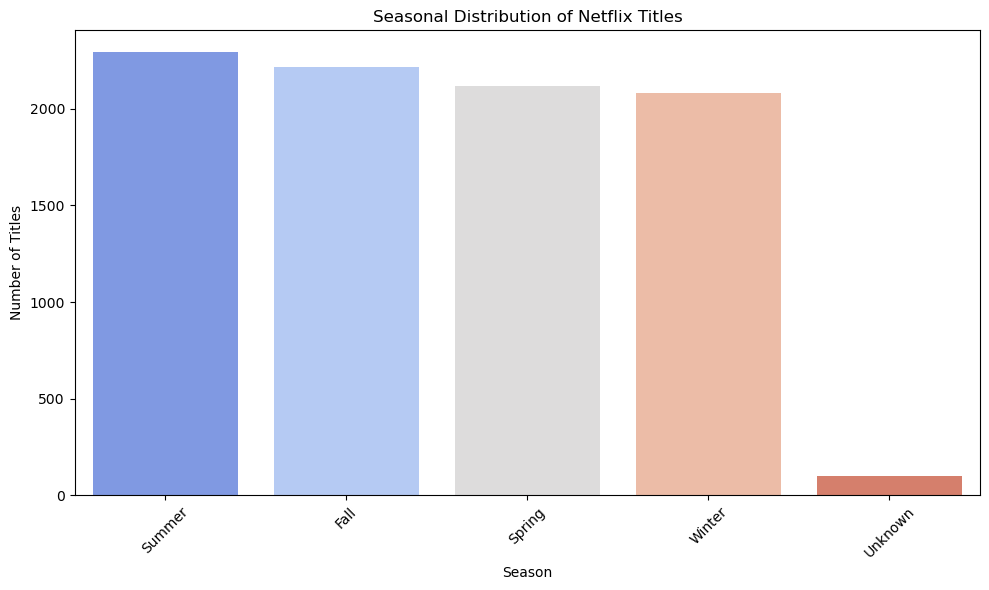

In [67]:
# Aggregate data by season
season_counts = cleaned_netflix_data['season'].value_counts()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='coolwarm')
plt.title('Seasonal Distribution of Netflix Titles')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
import pickle

# Save the Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save the feature columns
with open("features.pkl", "wb") as f:
    pickle.dump(features.columns.tolist(), f)
